# <center> Gradiente Descendente em Python </center>

## Basic ToolBox - Gradiente Descendente

``Gradiente descendente`` é um método para **estimar os parâmetros** de um modelo a **partir dos dados**. Em funções mais complexas em que não sabemos a equação para **encontrar os parâmetros ótimos**, podemos usar o ``gradiente descendente``.

A ``Descida do Gradiente`` é uma ferramenta padrão para **otimizar funções complexas iterativamente** para encontrar um mínimo(local). O método consiste em encontrar, de forma iterativa, os **valores dos parâmetros que minimizam** determinada **função** de interesse, por exemplo uma **função que minimize os erros**. 

Uma função de erro bastante usada é o **erro médio quadrático**.

$L(\theta, Y) = \frac{1}{n}\sum_{i=1}^n(y_i- \theta)^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
def mse(theta, y_vals):
    return np.mean((y_vals - theta) ** 2)

def points_and_loss(y_vals, xlim, loss_fn):
    thetas = np.arange(xlim[0], xlim[1] + 0.01, 0.05)
    losses = [loss_fn(theta, y_vals) for theta in thetas]
    
    plt.figure(figsize=(9, 2))
    
    ax = plt.subplot(121)
    sns.rugplot(y_vals, height=0.3, ax=ax)
    plt.xlim(*xlim)
    plt.title('Points')
    plt.xlabel('Tip Percent')
    
    ax = plt.subplot(122)
    plt.plot(thetas, losses)
    plt.xlim(*xlim)
    plt.title(loss_fn.__name__)
    plt.xlabel(r'$ \theta $')
    plt.ylabel('Loss')
    #plt.legend()

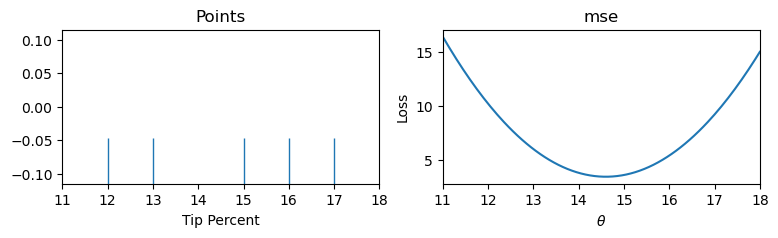

In [9]:
pts = np.array([12, 13, 15, 16, 17])
points_and_loss(pts, (11, 18), mse)

Vamos fazer uma função que percorre todos os valores de $\theta$, calcula o erro para cada um deles e retorna o $\theta$ com o menor erro:

In [10]:
def simple_minimize(loss_fn, dataset, thetas):
    losses = [loss_fn(theta, dataset) for theta in thetas]
    return thetas[np.argmin(losses)]

In [11]:
dataset = np.array([12, 13, 15, 16, 17])
thetas = np.arange(12, 18, 0.1)

simple_minimize(mse, dataset, thetas)

14.59999999999999

Agora usando todo o dataset:

In [12]:
tips = sns.load_dataset('tips')
tips['pcttip'] = tips['tip'] / tips['total_bill'] * 100
tips.head()

,total_bill,tip,sex,smoker,day,time,size,pcttip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


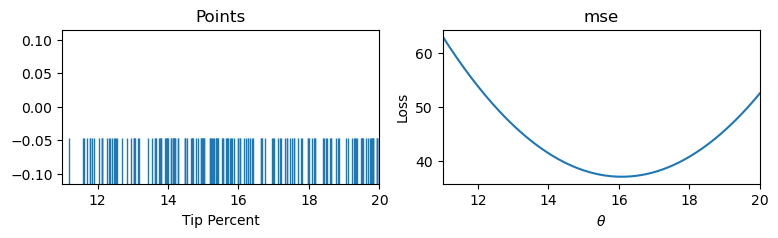

In [13]:
points_and_loss(tips['pcttip'], (11, 20), mse)

In [14]:
simple_minimize(mse, tips['pcttip'], thetas)

16.099999999999987

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_5348\2244366209.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['pcttip'], bins=50);


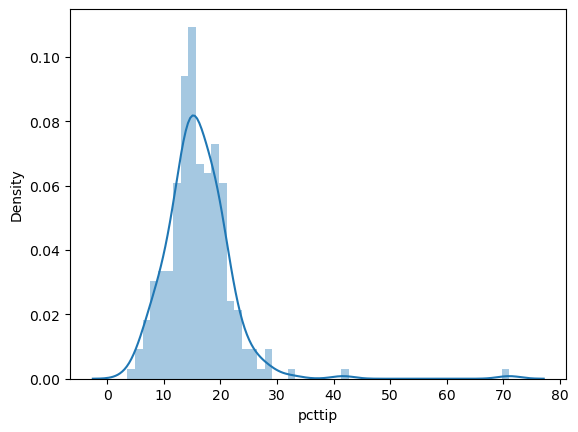

In [15]:
sns.distplot(tips['pcttip'], bins=50);

Quando a inclinação da reta é negativa, aumentar $\theta$ diminui o erro, já quando a inclinação é positiva, diminuir o $\theta$ diminui o erro. Podemos escrever esse comportamento matematicamente como:

$\theta^{(t+1)} = \theta^{(t)} - \frac{\partial}{\partial \theta} L(\theta^{(t)}, \textbf{y})$

Desenvolvendo essa equação temos: 

$
\begin{split}
\begin{aligned}
L(\theta, \textbf{y})
&= \frac{1}{n} \sum_{i = 1}^{n}(y_i - \theta)^2\\
\frac{\partial}{\partial \hat{\theta}} L(\theta, \textbf{y})
&= \frac{1}{n} \sum_{i = 1}^{n} -2(y_i - \theta) \\
&= -\frac{2}{n} \sum_{i = 1}^{n} (y_i - \theta) \\
\end{aligned}
\end{split}
$

Quanto $\theta^{(t)} = 12$, podemos calcular $-\frac{2}{n} \sum_{i = 1}^{n} (y_i - \theta) = -5.32$. Então $\theta^{(t+1)} = 12 - (-5.32) = 17.32$  

## Problemas com simple minimize?

*  Como testar todos os valores de $\theta$
*  Como definir o melhor incremento?

### Gradiente Descendente

In [16]:
def grad_mse(theta, y_vals):
    return -2 * np.mean(y_vals - theta)

def plot_loss(y_vals, xlim, loss_fn):
    thetas = np.arange(xlim[0], xlim[1] + 0.01, 0.05)
    losses = [loss_fn(theta, y_vals) for theta in thetas]
    
    plt.figure(figsize=(5, 3))
    plt.plot(thetas, losses, zorder=1)
    plt.xlim(*xlim)
    plt.title(loss_fn.__name__)
    plt.xlabel(r'$ \theta $')
    plt.ylabel('Loss')
    
def plot_theta_on_loss(y_vals, theta, loss_fn, **kwargs):
    loss = loss_fn(theta, y_vals)
    default_args = dict(label=r'$ \theta $', zorder=2,
                        s=200, c=sns.xkcd_rgb['green'])
    plt.scatter([theta], [loss], **{**default_args, **kwargs})

def plot_tangent_on_loss(y_vals, theta, loss_fn, eps=1e-6):
    slope = ((loss_fn(theta + eps, y_vals) - loss_fn(theta - eps, y_vals)) / (2 * eps))
    xs = np.arange(theta - 1, theta + 1, 0.05)
    ys = loss_fn(theta, y_vals) + slope * (xs - theta)
    plt.plot(xs, ys, zorder=3, c=sns.xkcd_rgb['green'], linestyle='--')

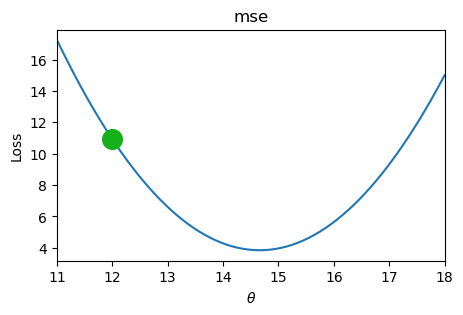

In [17]:
pts = np.array([12.1, 12.8, 14.9, 16.3, 17.2])
plot_loss(pts, (11, 18), mse)
plot_theta_on_loss(pts, 12, mse)

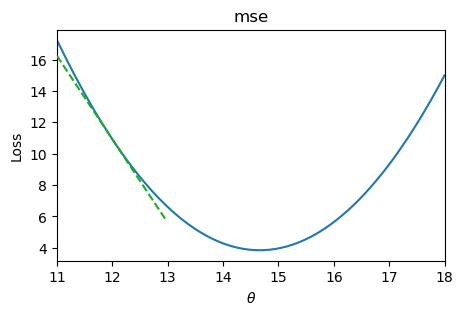

In [18]:
pts = np.array([12.1, 12.8, 14.9, 16.3, 17.2])
plot_loss(pts, (11, 18), mse)
plot_tangent_on_loss(pts, 12, mse)

## Algoritmo do Gradiente Descendente

1. Escolha o valor inicial de $\theta$
2. Calcule a tangente com: $\theta - \alpha \cdot \frac{\partial}{\partial \theta} L(\theta, \textbf{y})$ e atualize o novo $\theta$ com esse valor
3. Repita até que $\theta$ não se altere mais.

Uma outra notação comum para equação do gradiente é essa:
$ \theta^{(t+1)} = \theta^{(t)} - \alpha \cdot \nabla_\theta L(\theta^{(t)}, \textbf{y}) $

In [19]:
def minimize(loss_fn, grad_loss_fn, dataset, alpha=0.2, progress=True):
    theta = 0
    while True:
        if progress:
            print(f'theta: {theta:.2f} | loss: {loss_fn(theta, dataset):.2f}')
        gradient = grad_loss_fn(theta, dataset)
        new_theta = theta - alpha * gradient
        
        if abs(new_theta - theta) < 0.001:
            return new_theta
        
        theta = new_theta

In [20]:
theta = minimize(mse, grad_mse, np.array([12.1, 12.8, 14.9, 16.3, 17.2]))
print(f'Minimizing theta: {theta}')

theta: 0.00 | loss: 218.76
theta: 5.86 | loss: 81.21
theta: 9.38 | loss: 31.70
theta: 11.49 | loss: 13.87
theta: 12.76 | loss: 7.45
theta: 13.52 | loss: 5.14
theta: 13.98 | loss: 4.31
theta: 14.25 | loss: 4.01
theta: 14.41 | loss: 3.90
theta: 14.51 | loss: 3.86
theta: 14.57 | loss: 3.85
theta: 14.61 | loss: 3.85
theta: 14.63 | loss: 3.84
theta: 14.64 | loss: 3.84
theta: 14.65 | loss: 3.84
theta: 14.65 | loss: 3.84
theta: 14.66 | loss: 3.84
theta: 14.66 | loss: 3.84
Minimizing theta: 14.658511131035242


## Gradiente Descendente Estocástico

O gradiente descendente é calculado em cima de **todos** os pontos do nosso dataset e isso pode ser lento em caso de datasets muito grandes (por exemplo, dataset de imagens). Esse gradiente calculado em cima do somatório para todo dataset é chamado de gradiente em **batch** (lote). 

Uma maneira de agilizar esse processo é atualizar os parâmetros calculado o gradiente para cada ponto, ao invés de todo dataset. Um detalhe importante é que esse ponto deve ser escolhido aleatoriamente. Esse algoritmo de é chamado de gradiente descendente estocástico (SGD). 

Uma maneira de rodar o SGD é embaralhando os dados e a cada iteração atualizar os parâmetros seguindo a ordem dos dados embaralhados. Quando passamos sobre todo o conjunto de dados e o gradiente não convergiu, embaralhamos os dados novamente e fazemos uma segunda passada. Cada **iteração** do SGD atualiza os parâmetros usando apenas um ponto e cada passada completa sobre todo conjunto de dados é chamado de **época**.

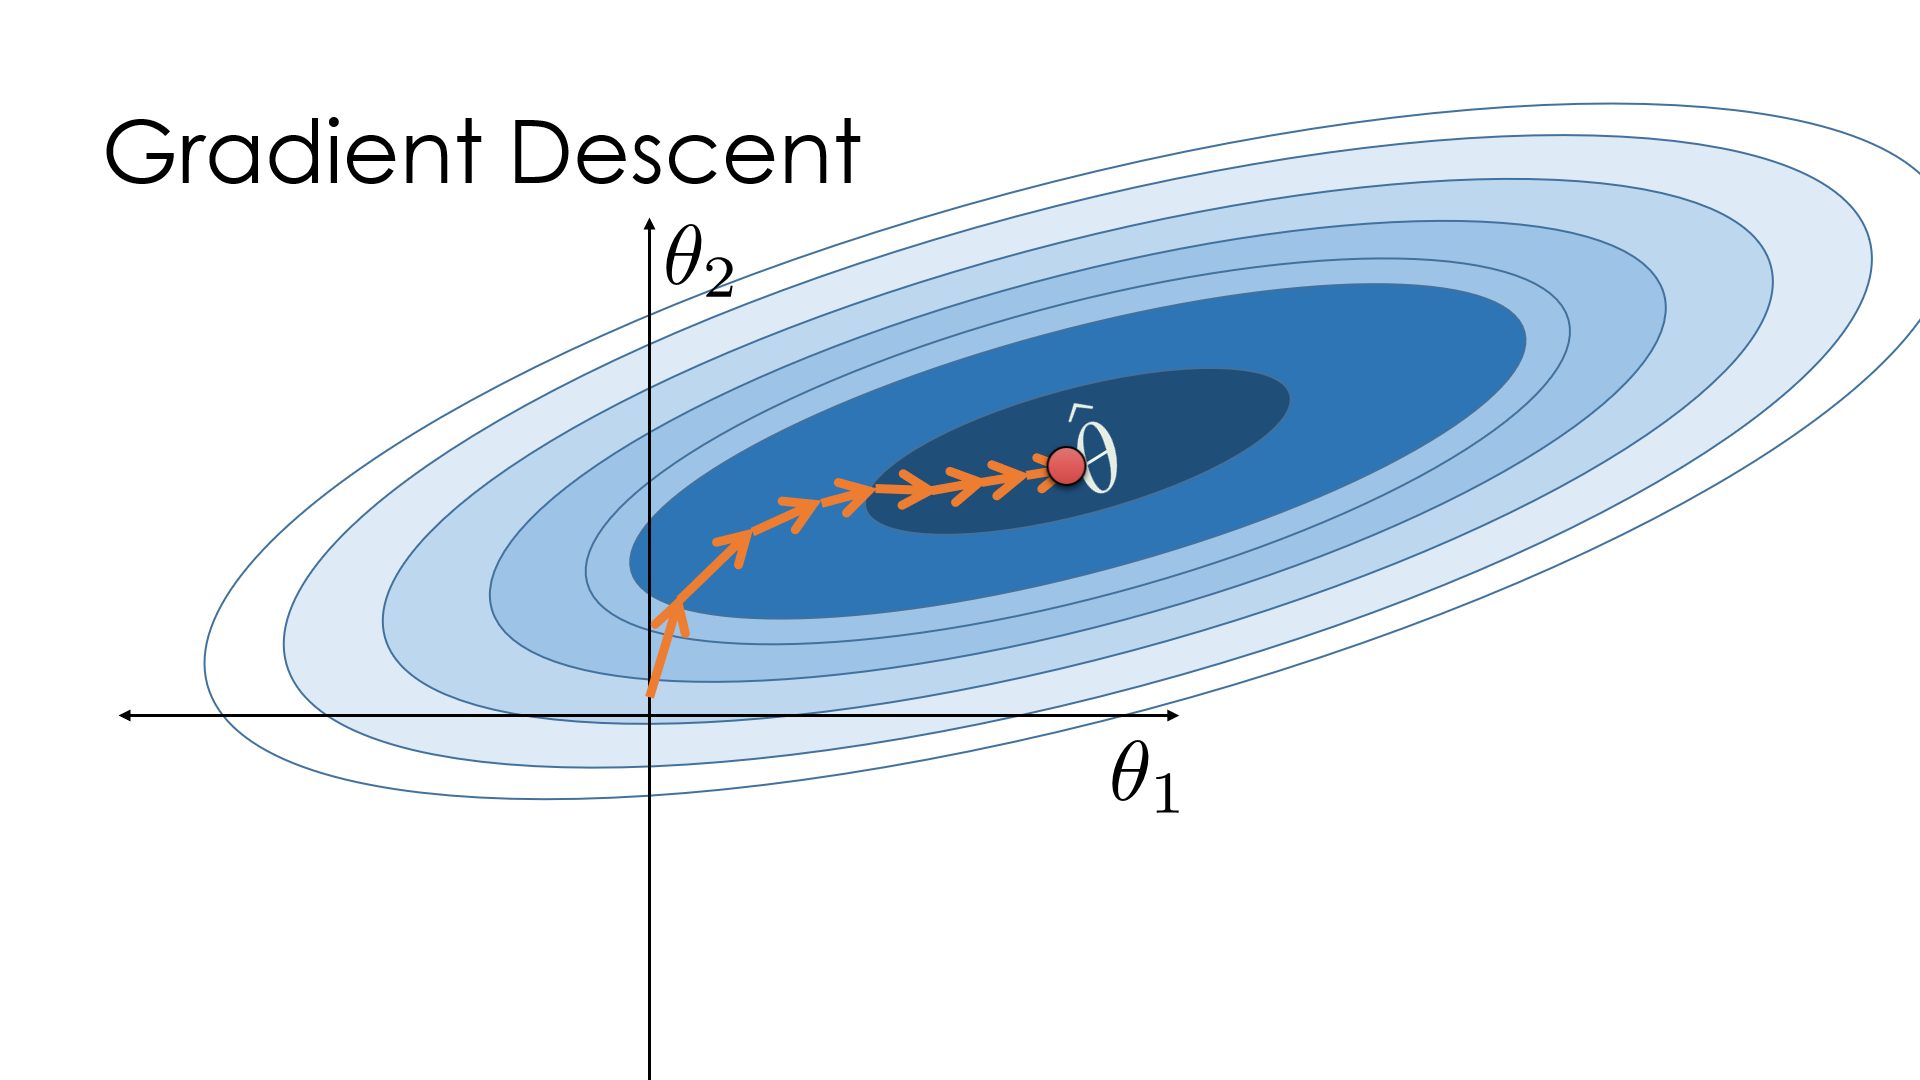


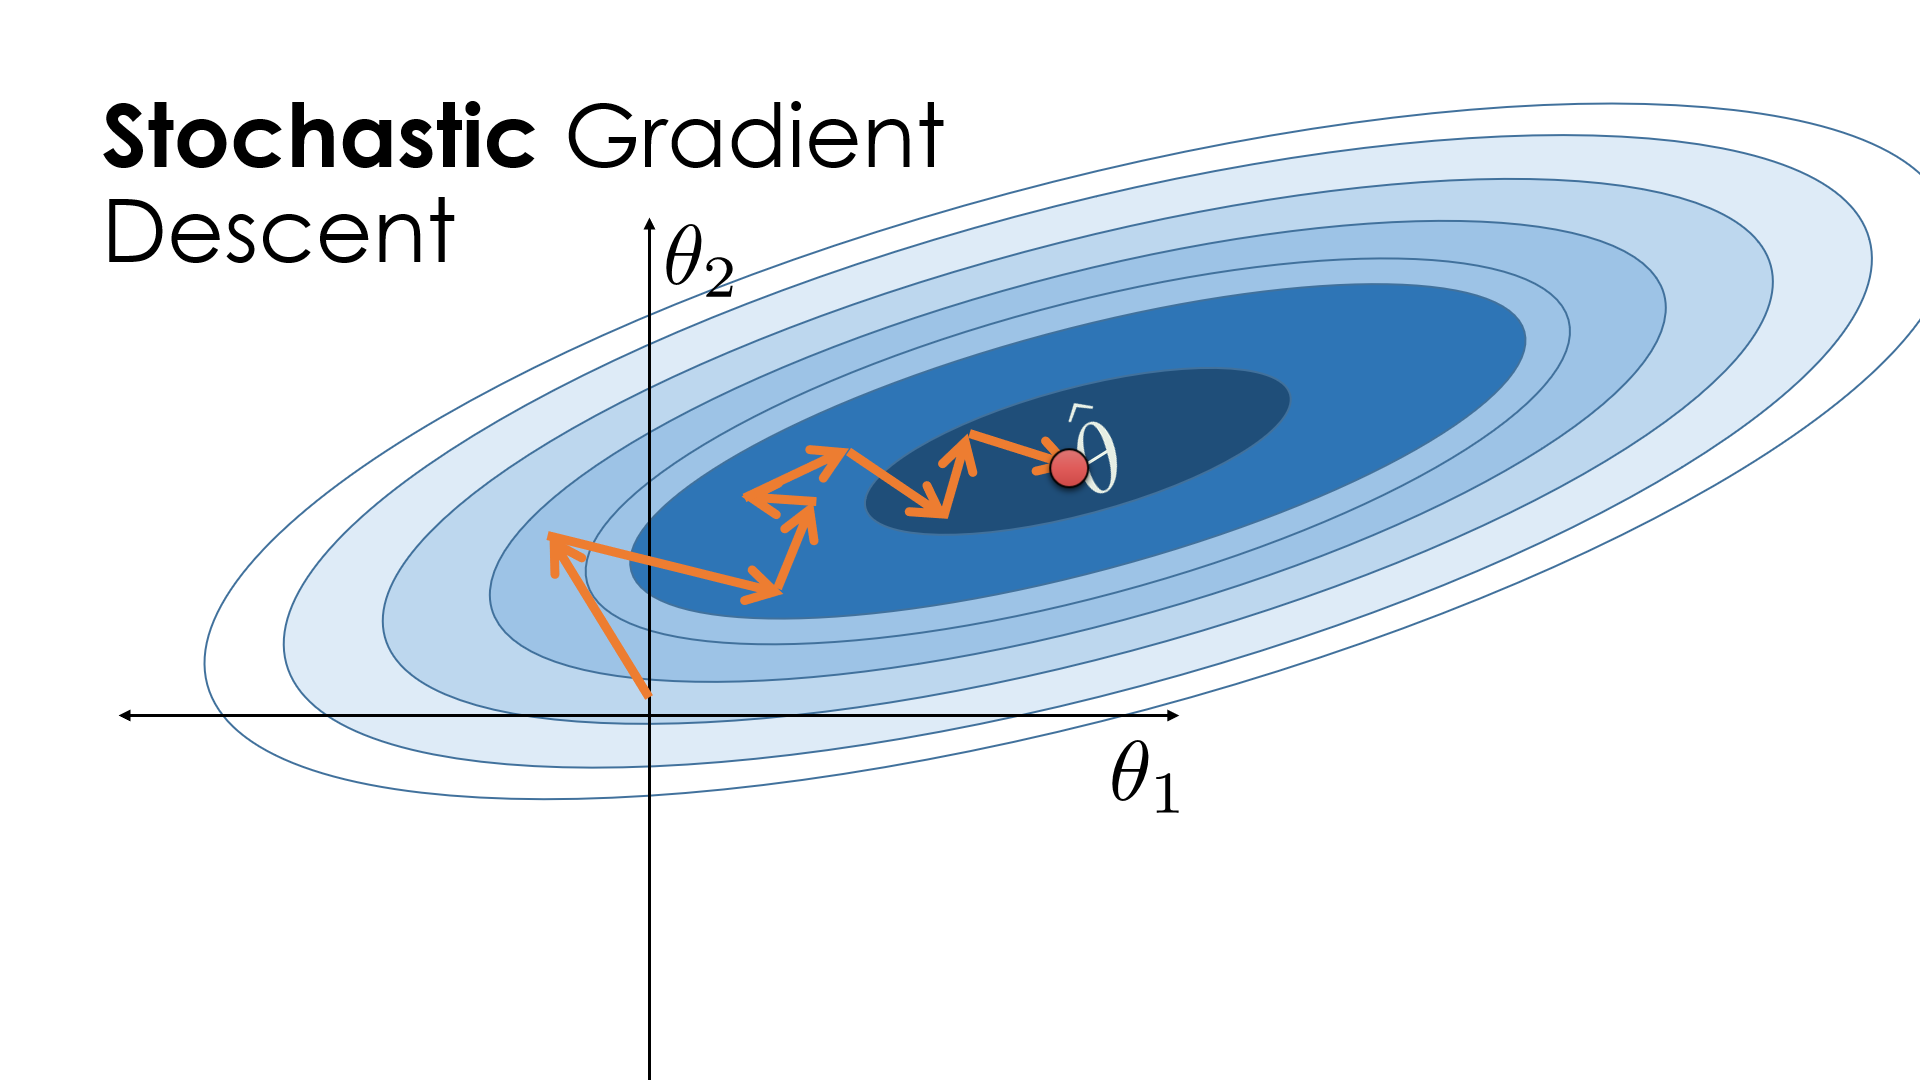

In [21]:
def minimize_sgd(loss_fn, grad_loss_fn, dataset, alpha=0.2):
    NUM_OBS = len(dataset)
    theta = 0
    np.random.shuffle(dataset)
    while True:
        for i in range(0, NUM_OBS, 1):
            rand_obs = dataset[i]
            gradient = grad_loss_fn(theta, rand_obs)
            new_theta = theta - alpha * gradient
        
            if abs(new_theta - theta) < 0.001:
                return new_theta
        
            theta = new_theta
        np.random.shuffle(dataset)

## Gradiente Descendente em Mini-Batch

A ideia do gradiente descendente em mini-batches é fazer um meio termo entre o SGD e o gradiente em batch, escolhendo batches de tamanhos pequenos entre 10 e 100 para atualizar os parâmetros.

In [22]:
def minimize_mini_batch(loss_fn, grad_loss_fn, dataset, minibatch_size, alpha=0.2):
    NUM_OBS = len(dataset)
    assert minibatch_size < NUM_OBS
    
    theta = 0
    np.random.shuffle(dataset)
    while True:
        for i in range(0, NUM_OBS, minibatch_size):
            mini_batch = dataset[i:i+minibatch_size]
            gradient = grad_loss_fn(theta, mini_batch)
            new_theta = theta - alpha * gradient
            
            if abs(new_theta - theta) < 0.001:
                return new_theta
            
            theta = new_theta
        np.random.shuffle(dataset)

## Usando o Gradiente Descendente para Regressão Linear

Nos exemplos anteriores usamos o gradiente descendente para encontrar o melhor parâmetro $\theta$ com o menor erro. Agora vamos usar novamente o gradiente descendente para encontrar dois parâmetros da equação da regressão linear:

$f_\boldsymbol\theta (x) = \theta_1 x + \theta_0$

Usando a mesma função de erro:

$L(\boldsymbol\theta, \textbf{x}, \textbf{y}) = \frac{1}{n} \sum_{i = 1}^{n}(y_i - f_\boldsymbol\theta (x_i))^2 $

Para encontrar a tangente precisamos derivar a equação de erro:

\begin{aligned}
\nabla_{\boldsymbol\theta} L(\boldsymbol\theta, \textbf{x}, \textbf{y})
&= \nabla_{\boldsymbol\theta} \left[ \frac{1}{n} \sum_{i = 1}^{n}(y_i - f_\boldsymbol\theta (x_i))^2 \right] \\
&= \frac{1}{n} \sum_{i = 1}^{n}2 (y_i - f_\boldsymbol\theta (x_i))(- \nabla_{\boldsymbol\theta} f_\boldsymbol\theta (x_i))\\
&= -\frac{2}{n} \sum_{i = 1}^{n}(y_i - f_\boldsymbol\theta (x_i))(\nabla_{\boldsymbol\theta} f_\boldsymbol\theta (x_i))\\
\end{aligned}


Para calcular $\nabla_{\boldsymbol\theta} f_\boldsymbol\theta (x_i) $ fazemos:

$ \begin{aligned}
\nabla_{\boldsymbol\theta} f_\boldsymbol\theta (x_i)
&= \begin{bmatrix}
     \frac{\partial}{\partial \theta_0} f_\boldsymbol\theta (x_i)\\
     \frac{\partial}{\partial \theta_1} f_\boldsymbol\theta (x_i)
   \end{bmatrix} \\
&= \begin{bmatrix}
     \frac{\partial}{\partial \theta_0} [\theta_1 x_i + \theta_0]\\
     \frac{\partial}{\partial \theta_1} [\theta_1 x_i + \theta_0]
   \end{bmatrix} \\
&= \begin{bmatrix}
     1 \\
     x_i
   \end{bmatrix} \\
\end{aligned} $

Voltando para equação anterior do erro:

$\begin{aligned}
\nabla_{\boldsymbol\theta} L(\theta, \textbf{x}, \textbf{y})
&= -\frac{2}{n} \sum_{i = 1}^{n}(y_i - f_\boldsymbol\theta (x_i))(\nabla_{\boldsymbol\theta} f_\boldsymbol\theta (x_i))\\
&= -\frac{2}{n} \sum_{i = 1}^{n} (y_i - f_\boldsymbol\theta (x_i)) \begin{bmatrix} 1 \\ x_i \end{bmatrix} \\
&= -\frac{2}{n} \sum_{i = 1}^{n} \begin{bmatrix}
    (y_i - f_\boldsymbol\theta (x_i)) \\
    (y_i - f_\boldsymbol\theta (x_i)) x_i
    \end{bmatrix} \\
\end{aligned}$

In [23]:
def minimize(loss_fn, grad_loss_fn, x_vals, y_vals,
             alpha=0.0005, progress=True):

    theta = np.array([0., 0.])
    loss = loss_fn(theta, x_vals, y_vals)
    while True:
        if progress:
            print(f'theta: {theta} | loss: {loss}')
        gradient = grad_loss_fn(theta, x_vals, y_vals)
        new_theta = theta - alpha * gradient
        new_loss = loss_fn(new_theta, x_vals, y_vals)
        
        if abs(new_loss - loss) < 0.0001:
            return new_theta
        
        theta = new_theta
        loss = new_loss

In [24]:
def simple_linear_model(thetas, x_vals):
    return thetas[0] + thetas[1] * x_vals

def mse_loss(thetas, x_vals, y_vals):
    return np.mean((y_vals - simple_linear_model(thetas, x_vals)) ** 2)

In [25]:
def grad_mse_loss(thetas, x_vals, y_vals):
    n = len(x_vals)
    grad_0 = y_vals - simple_linear_model(thetas, x_vals)
    grad_1 = (y_vals - simple_linear_model(thetas, x_vals)) * x_vals
    return -2 / n * np.array([np.sum(grad_0), np.sum(grad_1)])
    
thetas = np.array([1, 1])
x_vals = np.array([3, 4])
y_vals = np.array([4, 5])
assert np.allclose(grad_mse_loss(thetas, x_vals, y_vals), [0, 0])

In [26]:
thetas = minimize(mse_loss, grad_mse_loss, tips['total_bill'], tips['tip'])

theta: [0. 0.] | loss: 10.896283606557375
theta: [0.00299828 0.06761316] | loss: 3.8937622006094674
theta: [0.00465577 0.10336098] | loss: 1.935944326716822
theta: [0.0056043  0.12225981] | loss: 1.3885384482860965
theta: [0.00617795 0.13224964] | loss: 1.235459416905534
theta: [0.00655336 0.13752879] | loss: 1.1926273731479424
theta: [0.00682395 0.14031714] | loss: 1.180618494451706
theta: [0.0070391  0.14178846] | loss: 1.1772272516962659
theta: [0.00722492 0.1425634 ] | loss: 1.1762453624313742
theta: [0.00739522 0.14297012] | loss: 1.175937098098915
theta: [0.00755731 0.14318215] | loss: 1.1758171789667664


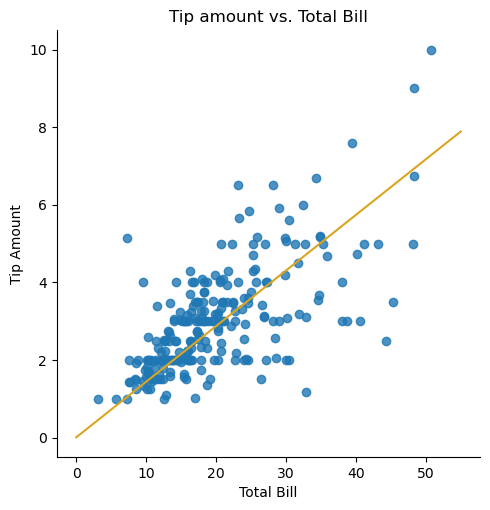

In [27]:
x_vals = np.array([0, 55])
sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False)
plt.plot(x_vals, simple_linear_model(thetas, x_vals), c='goldenrod')
plt.title('Tip amount vs. Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount');